<a href="https://colab.research.google.com/github/Divya-d14/Walmart-CaseStudy/blob/main/WalmartCasestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case: Walmart - Confidence Interval and CLT**

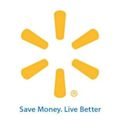

**About Walmart:**

Walmart is an American multinational retail corporation that operates a chain of
supercenters, discount departmental stores, and grocery stores in the United States.
Walmart has more than 100 million customers worldwide.


**Business Problem:**

The Management team at Walmart Inc. wants to analyze **the customer purchase behavior (specifically, purchase amount) against the customer's gender and the various other factors** to help the business make better decisions. They want to understand if the **spending habits differ between male and female customers**.

In [ ]:
#importing basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#reading the data into a dataframe

df_walmart = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094')
df_walmart.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


**Checking Structure and Characterestics of Data**

In [ ]:
df_walmart.shape

(550068, 10)

In [ ]:
df_walmart.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
df_walmart.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

No Null/missing values in data

In [ ]:
df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
for i in df_walmart.columns[:-1]:
  df_walmart[i]=df_walmart[i].astype('category')

df_walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


since all the columns in df are categorical variables except purchase, converted them into category for efficient memory usage and better analysis.

In [ ]:
df_walmart.describe(include='category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


In [ ]:
df_walmart.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


<Axes: ylabel='Purchase'>

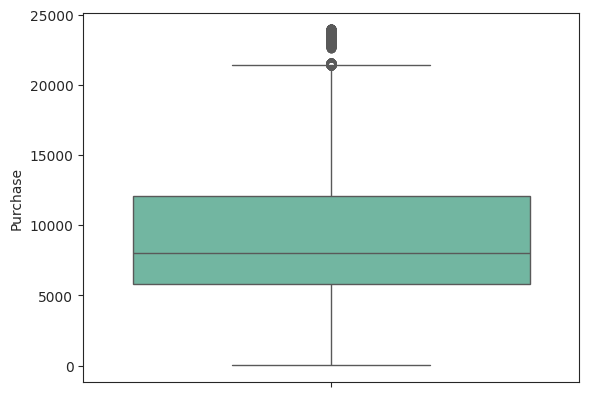

In [ ]:
sns.boxplot(df_walmart['Purchase'])

Purchase has outliers

**UNIVARIATE ANALYSIS**


<Axes: xlabel='Purchase', ylabel='Count'>

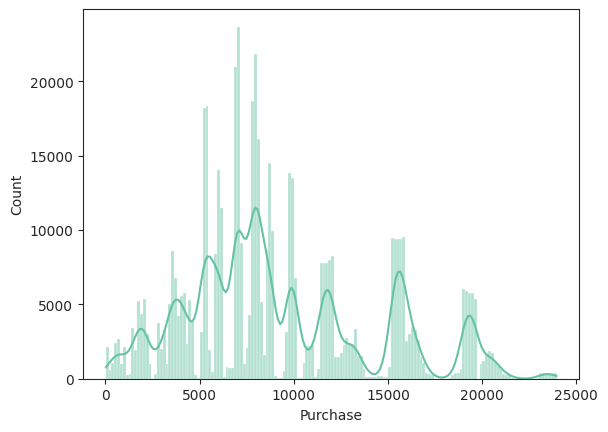

In [ ]:
sns.histplot(data=df_walmart,x='Purchase',kde=True)

Most spent amount is between 5000 - 10000

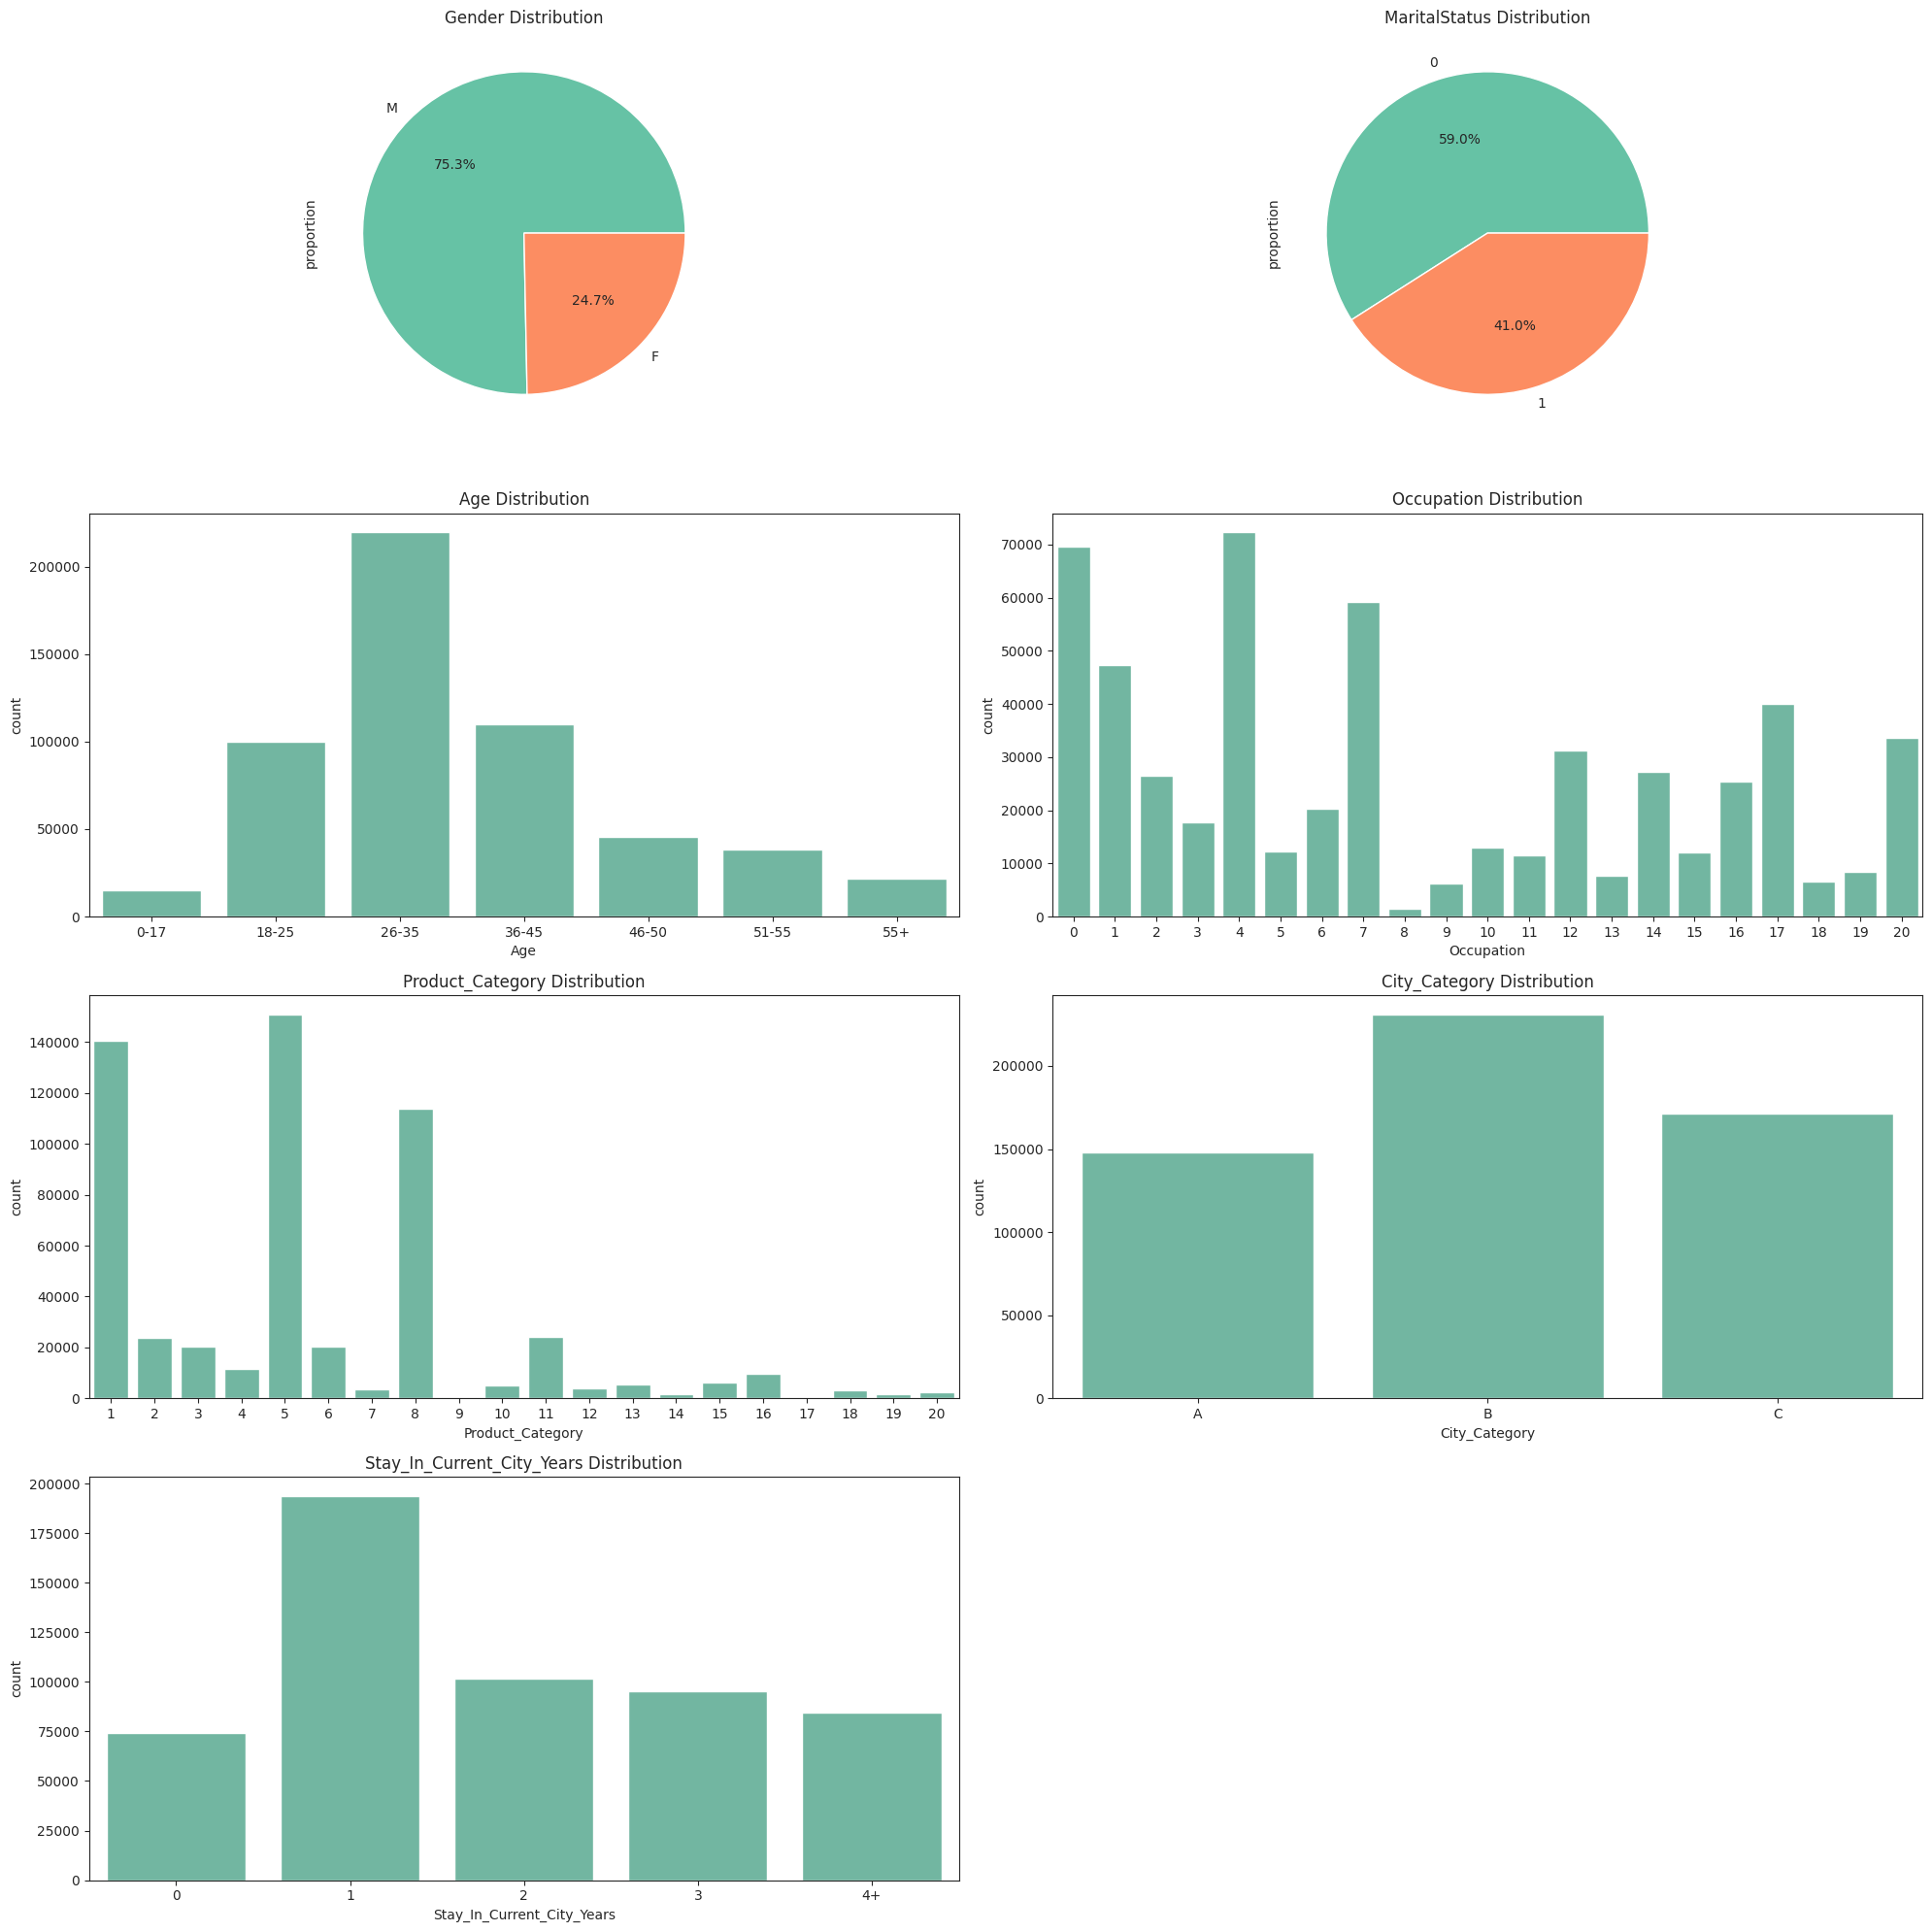

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(4,2,1)
sns.pie=(df_walmart['Gender'].value_counts(normalize=True)*100).plot(kind='pie',autopct='%1.1f%%')
sns.pie.set_title('Gender Distribution')

plt.subplot(4,2,2)
sns.pie=(df_walmart['Marital_Status'].value_counts(normalize=True)*100).plot(kind='pie',autopct='%1.1f%%')
sns.pie.set_title('MaritalStatus Distribution')

plt.subplot(4,2,3)
sns.countplot(data=df_walmart,x='Age')
plt.title('Age Distribution')

plt.subplot(4,2,4)
sns.countplot(data=df_walmart,x='Occupation')
plt.title('Occupation Distribution')

plt.subplot(4,2,5)
sns.countplot(data=df_walmart,x='Product_Category')
plt.title('Product_Category Distribution')

plt.subplot(4,2,6)
sns.countplot(data=df_walmart,x='City_Category')
plt.title('City_Category Distribution')

plt.subplot(4,2,7)
sns.countplot(data=df_walmart,x='Stay_In_Current_City_Years')
plt.title('Stay_In_Current_City_Years Distribution')

plt.tight_layout()

plt.show()


In [ ]:
df_walmart.groupby('Product_Category')['Purchase'].mean().sort_values(ascending=False)

Product_Category
10    19675.570927
7     16365.689600
6     15838.478550
9     15537.375610
15    14780.451828
16    14766.037037
1     13606.218596
14    13141.625739
2     11251.935384
17    10170.759516
3     10096.705734
8      7498.958078
5      6240.088178
11     4685.268456
18     2972.864320
4      2329.659491
12     1350.859894
13      722.400613
20      370.481176
19       37.041797
Name: Purchase, dtype: float64

In [ ]:
df_walmart.groupby('Product_ID')['Purchase'].mean().sort_values(ascending=False)

Product_ID
P00086242    21256.505495
P00085342    20980.268116
P00200642    20468.773234
P00116142    20463.791277
P00119342    20448.756494
                 ...     
P00372445      374.930705
P00375436      374.266585
P00371644      362.911012
P00370853       37.393643
P00370293       36.675159
Name: Purchase, Length: 3631, dtype: float64

In [ ]:
df_walmart.groupby('Occupation')['Purchase'].mean().sort_values(ascending=False)

Occupation
17    9821.478236
12    9796.640239
15    9778.891163
8     9532.592497
14    9500.702772
7     9425.728223
16    9394.464349
5     9333.149298
13    9306.351061
6     9256.535691
4     9213.980251
11    9213.845848
3     9178.593088
18    9169.655844
0     9124.428588
10    8959.355375
1     8953.193270
2     8952.481683
20    8836.494905
19    8710.627231
9     8637.743761
Name: Purchase, dtype: float64

In [ ]:
df_walmart.groupby('City_Category')['Purchase'].mean().sort_values(ascending=False)

City_Category
C    9719.920993
B    9151.300563
A    8911.939216
Name: Purchase, dtype: float64

In [ ]:
df_walmart.groupby('Stay_In_Current_City_Years')['Purchase'].mean().sort_values(ascending=False)

Stay_In_Current_City_Years
2     9320.429810
3     9286.904119
4+    9275.598872
1     9250.145923
0     9180.075123
Name: Purchase, dtype: float64

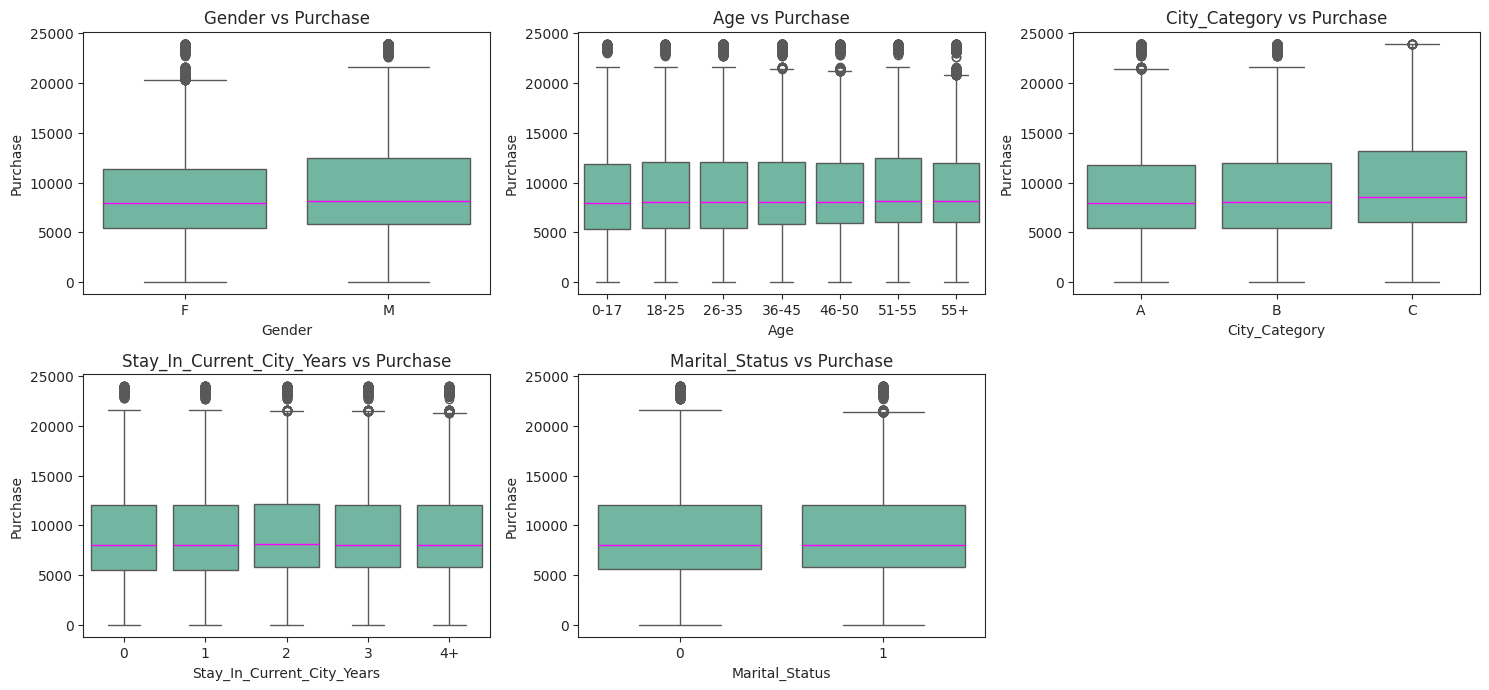

In [ ]:
#Bivariate analysis

plt.figure(figsize=(15, 10))
sns.set_style('ticks')
sns.set_palette('Set2')

for i, column in enumerate(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df_walmart, x=column, y='Purchase',medianprops={'color': 'magenta'})
    plt.title(column +' vs Purchase')
    plt.xlabel(column)
    plt.ylabel('Purchase')

plt.tight_layout()
plt.show()


- Most Users and Most Purchases are from Males(as of Gender)
- Most people are from 26-35 age group followed by 36-45 and 18-25
- More users bought P00265242, while P00086242 generated more amount.
  Similarly 1,5,8 are most sold products and 9,17 are least but most amount generated are from Categories 10,7,6,9.
- 0,4 occupation users and 1 year staying users are more
- B city_category people are more but buying level of C city_Category is high

In [ ]:
#What Products are different age groups buying
df_walmart.groupby('Age')['Product_Category'].nunique()

Age
0-17     20
18-25    20
26-35    20
36-45    20
46-50    20
51-55    20
55+      20
Name: Product_Category, dtype: int64

In [ ]:
pd.crosstab(df_walmart['Product_Category'],df_walmart['Age'],normalize=True,margins=True)*100

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,All
Product_Category,,,,,,,,
1,0.651738,4.901576,10.589418,5.026288,1.904128,1.645069,0.801901,25.520118
2,0.146346,0.804991,1.623072,0.892981,0.382680,0.323778,0.164525,4.338373
3,0.218155,0.856258,1.392919,0.700641,0.250151,0.167979,0.088535,3.674637
4,0.137801,0.447763,0.762088,0.427947,0.179978,0.123257,0.057811,2.136645
5,0.787175,5.185177,11.175527,5.340612,2.176276,1.798505,0.975698,27.438971
6,0.072536,0.681552,1.542537,0.708821,0.294873,0.263604,0.156708,3.720631
7,0.009635,0.087444,0.300145,0.147073,0.059447,0.048358,0.024361,0.676462
8,0.410495,3.256143,8.045551,4.235113,1.937215,1.697972,1.128588,20.711076
9,0.002909,0.011453,0.027997,0.019452,0.005999,0.005272,0.001454,0.074536


 - There is no such product that has 0 sales in any age group. All the products have been using by all age groups.

 - Clearly 1,5,8 has more market (about 72%) and 26-35 age buying levels is more.


<Axes: xlabel='Age', ylabel='Purchase'>

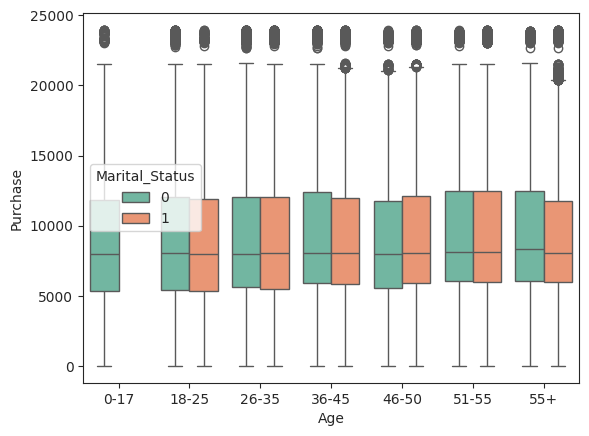

In [ ]:
#Is there a relationship between age, marital status, and the amount spent?
sns.boxplot(data=df_walmart,x='Age',y='Purchase',hue='Marital_Status')

There is no impact between age,gender and amount spent

In [ ]:
#Are there preferred product categories for different genders?

<Axes: xlabel='Gender', ylabel='Product_Category'>

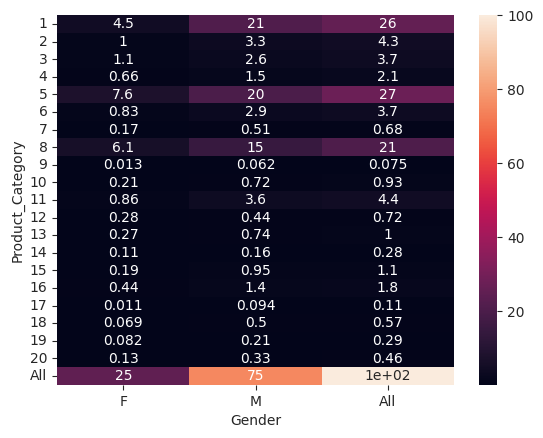

In [ ]:
sns.heatmap(pd.crosstab(df_walmart['Product_Category'],df_walmart['Gender'],normalize=True,margins=True)*100,annot=True)

Around 66% of the males and 36% of females bought 1,5,8 product Category.

In [ ]:
#How does gender affect the amount spent?

df_walmart.groupby('Gender')['User_ID'].nunique()

Gender
F    1666
M    4225
Name: User_ID, dtype: int64

In [ ]:
df_walmart.groupby('Gender')['Purchase'].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

In [ ]:
female_data = df_walmart[df_walmart['Gender']=='F']
male_data = df_walmart[df_walmart['Gender']=='M']

female_avg_purchase=female_data['Purchase'].mean().round(2)
male_avg_purchase=male_data['Purchase'].mean().round(2)

print("Female Average Purchase: ",female_avg_purchase)
print("Male Average Purchase: ",male_avg_purchase)

Female Average Purchase:  8734.57
Male Average Purchase:  9437.53


The average amount spent by male and female doesn't look same.
But Does it significantly different even for actual Population? Let's check this using CLT

According to Central Limit Theorem, irrespective of the shape of original population, the mean should be normal distribution with all the means of samples.



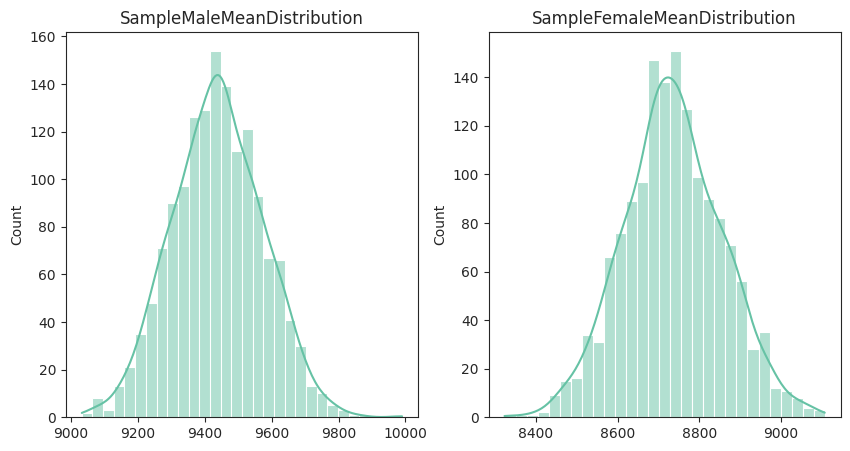

In [ ]:
#Checking the mean distribution if it is following Gaussean/Normal

n = 1500 #Sample_size
male_means = []
female_means = []
for i in range(n):
  female_mean = female_data.sample(n,replace=True)['Purchase'].mean()
  male_mean = male_data.sample(n,replace=True)['Purchase'].mean()
  male_means.append(male_mean)
  female_means.append(female_mean)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.histplot(male_means,kde=True)
plt.title('SampleMaleMeanDistribution')

plt.subplot(1,2,2)
sns.histplot(female_means,kde=True)
plt.title('SampleFemaleMeanDistribution')

plt.show()

<Figure size 1000x500 with 0 Axes>

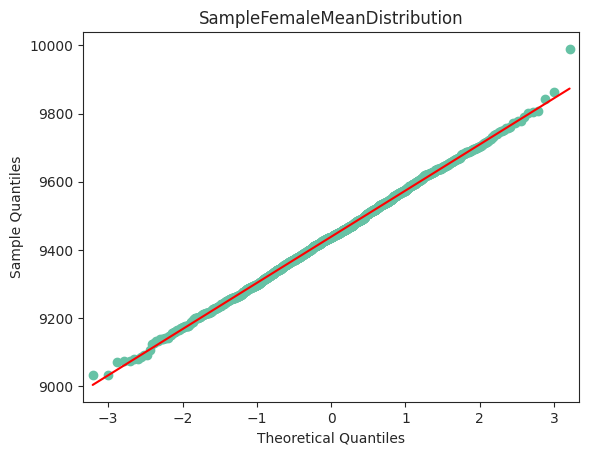

In [ ]:
import statsmodels.api as sm

plt.figure(figsize=(10,5))
sm.qqplot(np.array(male_means),line='s')
plt.title('SampleFemaleMeanDistribution')
plt.show()

In [ ]:
#Since the means are actually in normal distribution finding out the Confidence intervals of mean of genders
# using samples of 300,3000,30000 with 90,95,99 percent confidence levels.

from scipy.stats import norm
male_means = []
female_means = []

print("The average amount spent by female is",female_avg_purchase)
print("The average amount spent by male is",male_avg_purchase)

for n in [300,3000,30000]:
  for i in range(n):
    female_mean = female_data.sample(n,replace=True)['Purchase'].mean()
    male_mean = male_data.sample(n,replace=True)['Purchase'].mean()
    male_means.append(male_mean)
    female_means.append(female_mean)

  sample_male_mean = np.mean(male_means).round(2)
  sample_female_mean = np.mean(female_means).round(2)
  sample_male_stddev = pd.Series(male_means).std().round(2)
  sample_female_stddev = pd.Series(female_means).std().round(2)

  print("\n\nFOR SAMPLE : ",n)
  print("sample male stddev: ",sample_male_stddev)
  print("sample female stddev: ",sample_female_stddev)
  for p in [0.90,0.95,0.99]:
    male_avg_from = sample_male_mean - norm.ppf(p)*(sample_male_stddev)
    male_avg_to = sample_male_mean + norm.ppf(p)*(sample_male_stddev)

    female_avg_from = sample_female_mean - norm.ppf(p)*(sample_female_stddev)
    female_avg_to = sample_female_mean + norm.ppf(p)*(sample_female_stddev)

    print("**The Average Amount Spent Intervals Of Male and Female with confidence of",round(p*100),"% is**")
    print("\tMale Average Amount Spent: ",male_avg_from," to ",male_avg_to)
    print("\tFemale Average Amount Spent: ",female_avg_from," to ",female_avg_to)

The average amount spent by female is 8734.57
The average amount spent by male is 9437.53


FOR SAMPLE :  300
sample male stddev:  296.92
sample female stddev:  276.17
**The Average Amount Spent Intervals Of Male and Female with confidence of 90 % is**
	Male Average Amount Spent:  9053.671709158498  to  9814.708290841503
	Female Average Amount Spent:  8390.163904143548  to  9098.016095856452
**The Average Amount Spent Intervals Of Male and Female with confidence of 95 % is**
	Male Average Amount Spent:  8945.800061085569  to  9922.579938914432
	Female Average Amount Spent:  8289.830773844813  to  9198.349226155187
**The Average Amount Spent Intervals Of Male and Female with confidence of 99 % is**
	Male Average Amount Spent:  8743.450789239794  to  10124.929210760207
	Female Average Amount Spent:  8101.622507626141  to  9386.557492373859


FOR SAMPLE :  3000
sample male stddev:  126.49
sample female stddev:  117.24
**The Average Amount Spent Intervals Of Male and Female with confidence

**Clearly, The average amount spent by male is higher than those of female**

we can also see the confidence intervals of different samples do getting overlap but as the sample size increases,

-  the width of the confidence interval decreases ( providing more accurate range close to actual mean)

-  the lesser the spread of distribution making it more narrower bellcurve

In [ ]:
#How does MaritalStatus affect the amount spent?

single_ppl= df_walmart[df_walmart['Marital_Status']==0]
married_ppl = df_walmart[df_walmart['Marital_Status']==1]

single_ppl_avg_purchase=single_ppl['Purchase'].mean().round(2)
married_ppl_avg_purchase=married_ppl['Purchase'].mean().round(2)



In [ ]:
df_walmart.groupby('Marital_Status')['User_ID'].nunique()

Marital_Status
0    3417
1    2474
Name: User_ID, dtype: int64

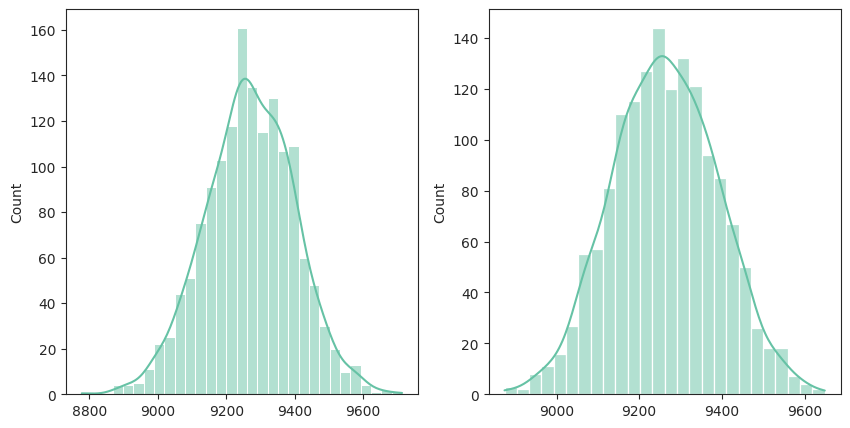

In [ ]:
#Checking the mean distribution if it is following Gaussean/Normal

n = 1500 #Sample_size
single_ppl_means = []
married_ppl_means = []
for i in range(n):
  single_ppl_mean = single_ppl.sample(n,replace=True)['Purchase'].mean()
  married_ppl_mean = married_ppl.sample(n,replace=True)['Purchase'].mean()
  single_ppl_means.append(single_ppl_mean)
  married_ppl_means.append(married_ppl_mean)

fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.histplot(single_ppl_means,kde=True,ax=axis[0])
sns.histplot(married_ppl_means,kde=True,ax=axis[1])
plt.show()

In [ ]:
#The clear bellcurve shows means are actually in normal distribution finding out the Confidence intervals of mean based on maritalstatus
# using samples of 300,3000,30000 with 90,95,99 percent confidence levels.

from scipy.stats import norm
single_ppl_means = []
married_ppl_means = []

print("Single People Average Purchase: ",single_ppl_avg_purchase)
print("Married People Average Purchase: ",married_ppl_avg_purchase)

for n in [300,3000,30000]:
  for i in range(n):
    single_ppl_mean = single_ppl.sample(n,replace=True)['Purchase'].mean()
    married_ppl_mean = married_ppl.sample(n,replace=True)['Purchase'].mean()
    single_ppl_means.append(single_ppl_mean)
    married_ppl_means.append(married_ppl_mean)

  sample_single_ppl_mean = np.mean(single_ppl_means).round(2)
  sample_married_ppl_mean = np.mean(married_ppl_means).round(2)
  sample_single_ppl_stddev = pd.Series(single_ppl_means).std().round(2)
  sample_married_ppl_stddev = pd.Series(married_ppl_means).std().round(2)

  print("\n\nFOR SAMPLE : ",n)
  for p in [0.90,0.95,0.99]:
    single_ppl_avg_from = sample_single_ppl_mean - norm.ppf(p)*(sample_single_ppl_stddev)
    single_ppl_avg_to = sample_single_ppl_mean + norm.ppf(p)*(sample_single_ppl_stddev)

    married_ppl_avg_from = sample_married_ppl_mean - norm.ppf(p)*(sample_married_ppl_stddev)
    married_ppl_avg_to = sample_married_ppl_mean + norm.ppf(p)*(sample_married_ppl_stddev)

    print("**The Average Amount Spent Intervals Of Single and Married People with confidence of",round(p*100),"% is**")
    print("\tSingle People Average Amount Spent: ",single_ppl_avg_from," to ",single_ppl_avg_to)
    print("\tMarried People Average Amount Spent: ",married_ppl_avg_from," to ",married_ppl_avg_to)

Single People Average Purchase:  9265.91
Married People Average Purchase:  9261.17


FOR SAMPLE :  300
**The Average Amount Spent Intervals Of Single and Married People with confidence of 90 % is**
	Single People Average Amount Spent:  8847.401355241915  to  9656.598644758085
	Married People Average Amount Spent:  8890.634507686751  to  9627.88549231325
**The Average Amount Spent Intervals Of Single and Married People with confidence of 95 % is**
	Single People Average Amount Spent:  8732.70326143515  to  9771.29673856485
	Married People Average Amount Spent:  8786.13430274368  to  9732.38569725632
**The Average Amount Spent Intervals Of Single and Married People with confidence of 99 % is**
	Single People Average Amount Spent:  8517.548712686566  to  9986.451287313434
	Married People Average Amount Spent:  8590.109297510893  to  9928.410702489107


FOR SAMPLE :  3000
**The Average Amount Spent Intervals Of Single and Married People with confidence of 90 % is**
	Single People Average A

The average amount spent by single people is very much overlapping  with those of Married. **The high overlapping clearly shows there is not much impact of marital status in purchase behavior and we can not say singles avg purchase is more or viceversa**.

In [ ]:
#Considering the Age effect on amount spent

df_walmart['Age'].unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

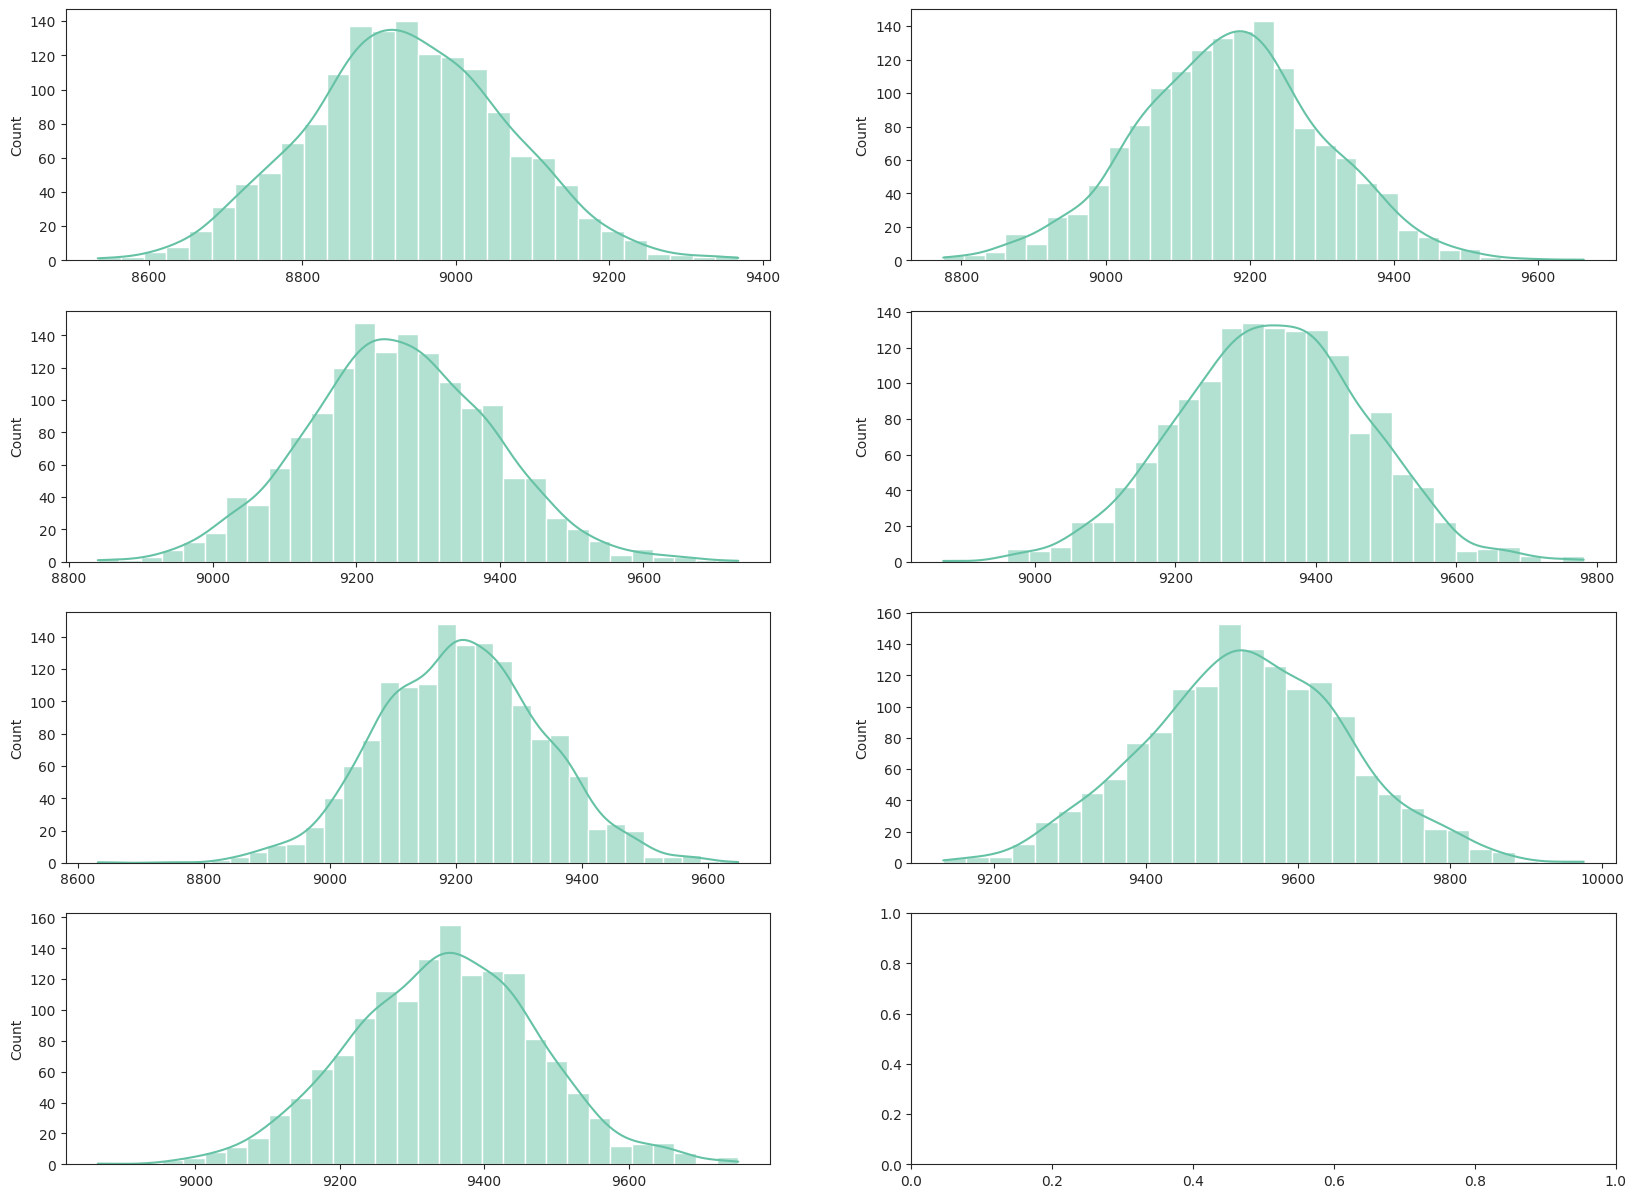

In [ ]:
#Checking the mean distribution if it is following Gaussean/Normal

df_age_means = {}
for i in ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']:
  df_age_purchase = df_walmart[df_walmart['Age']==i]
  df_age_means[i] = []
  n=1500
  for s in range(n):
    df_age_mean = df_age_purchase.sample(n,replace=True)['Purchase'].mean()
    df_age_means[i].append(df_age_mean)


fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))

sns.histplot(df_age_means['0-17'],kde=True,ax=axis[0,0])
sns.histplot(df_age_means['18-25'],kde=True,ax=axis[0,1])
sns.histplot(df_age_means['26-35'],kde=True,ax=axis[1,0])
sns.histplot(df_age_means['36-45'],kde=True,ax=axis[1,1])
sns.histplot(df_age_means['46-50'],kde=True,ax=axis[2,0])
sns.histplot(df_age_means['51-55'],kde=True,ax=axis[2,1])
sns.histplot(df_age_means['55+'],kde=True,ax=axis[3,0])

plt.show()


In [ ]:
#The clear bellcurve shows means are actually in normal distribution finding out the Confidence intervals of mean based on maritalstatus
# using samples of 300,3000,30000 with 90,95,99 percent confidence levels.

for i in ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']:
  df_age_purchase = df_walmart[df_walmart['Age']==i]
  df_age_avg_amount_spent = df_age_purchase['Purchase'].mean().round(2)
  print("\n\nThe average amount spent by people of age",i,"is",df_age_avg_amount_spent)
  df_age_means = []
  for n in [300,3000,30000]:
    for s in range(n):
      df_age_mean = df_age_purchase.sample(n,replace=True)['Purchase'].mean()
      df_age_means.append(df_age_mean)
    sample_df_age_mean = np.mean(df_age_means).round(2)
    sample_df_age_stddev = pd.Series(df_age_means).std().round(2)
    print("FOR SAMPLE : ",n)

    for p in [0.90,0.95,0.99]:
      df_age_means_from = sample_df_age_mean - norm.ppf(p)*(sample_df_age_stddev)
      df_age_means_to = sample_df_age_mean + norm.ppf(p)*(sample_df_age_stddev)

      print("People of age",i,"Average Amount Spent Intervals with confidence of",round(p*100),"% is ",df_age_means_from," to ",df_age_means_to)




The average amount spent by people of age 0-17 is 8933.46
FOR SAMPLE :  300
People of age 0-17 Average Amount Spent Intervals with confidence of 90 % is  8561.887328864872  to  9307.032671135126
People of age 0-17 Average Amount Spent Intervals with confidence of 95 % is  8456.268153572668  to  9412.65184642733
People of age 0-17 Average Amount Spent Intervals with confidence of 99 % is  8258.144146058847  to  9610.775853941152
FOR SAMPLE :  3000
People of age 0-17 Average Amount Spent Intervals with confidence of 90 % is  8769.771200945876  to  9091.568799054125
People of age 0-17 Average Amount Spent Intervals with confidence of 95 % is  8724.158627136243  to  9137.181372863757
People of age 0-17 Average Amount Spent Intervals with confidence of 99 % is  8638.597024414172  to  9222.742975585828
FOR SAMPLE :  30000
People of age 0-17 Average Amount Spent Intervals with confidence of 90 % is  8871.07164216502  to  8995.22835783498
People of age 0-17 Average Amount Spent Intervals wit

Questions:

***Are women spending more money per transaction than men? Why or Why not?
Confidence intervals and distribution of the mean of the expenses by female and male customers***

No, the women are not spending more. May be due to many reasons,some of them might be using their friend's account/cards for better offers.
Or may be less products for females comapritively.

The confidence intervals of mean of female and male expenses per product with 99% confidence are
Male :  9324.41  to  9550.49
Female:  8629.81  to  8839.93




***Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?***

There is a little overlap of averages when we consider the low number of samples( check above gender regarding averages). when we increase the sample size, we can clearly see the males are spending more.
Even less in number, females are contributing to a great level in purchases.
We can easily get more sales when we attracted large nuber of female customers.


***Results when the same activity is performed for Married vs Unmarried***
There is a very much overlap of married vs unmarried people amount spent per transaction.
For 30000 samples,
The Average Amount Spent Intervals Of Single and Married People with confidence of 90 % is
Single People Average Amount Spent:  9202.65  to  9328.76
Married People Average Amount Spent:  9200.06 to  9322.01
it's almost similar.

*The high overlapping clearly shows there is not much impact of marital status in purchase behavior and we can not say singles avg purchase is more or viceversa*


***Results when the same activity is performed for Age***

*Similarly for different age groups also, we can not conclude anything as their average purchase intervals are almost overlapping. Can't conclude that Age group also has any impact on avg purchase.*

-People of age 0-17 Average Amount Spent Intervals with confidence of 90 % is  8871.07  to  8995.23
-People of age 26-35 Average Amount Spent Intervals with confidence of 90 % is  9191.99  to  9313.35
-People of age 36-45 Average Amount Spent Intervals with confidence of 90 % is  9271.13  to  9390.99
-People of age 46-50 Average Amount Spent Intervals with confidence of 90 % is  9146.46  to  9270.44
-People of age 51-55 Average Amount Spent Intervals with confidence of 90 % is  9473.26  to  9596.24
-People of age 55+ Average Amount Spent Intervals with confidence of 90 % is  9275.46  to  9397.66

(pls note that values mentioned above can slightly differ in the above calcualtions when the page is refreshed)


## **Recommendations:**

- Marketing efforts (Offers/Advertisements) to attract female users can be done to increase purchases
- As male users are more, ensure to provide more types and personalized products to retain them and increase them.
- Products related to 18-40 age group should be targeted as they make 75% of purchases.
-The top products should be given focus in order to maintain the quality in order to further increase the sales of those products.
-People who are staying in city for an year have contributed to 35% of the total purchase amount. Company can focus on such customer base who are neither too old nor too new residents in the city.
-We have highest frequency of purchase order between 5k and 10k, company can focus more on these mid range products to increase the sales.
-The top 10 users who have purchased more company should give more offers and discounts so that they can be retained and can be helpful for companies business.
